In [19]:
import warnings
warnings.filterwarnings("ignore")

# Capítulo 01 - Estudo de Caso - Análise de Cartão de Crédito

## Entendimento do negócio

Nosso cliente é uma empresa de cartão de crédito que forneceu uma dataset que inclui dados demográficos e dados financeiros (últimos seis meses) de uma amostra de 30.000 titulares de contas. Esses dados estão no nível de conta de crédito; em outras palavras, há uma linha para cada conta. Se um cliente, nos últimos seis meses não realizou o pagamento mínimo, a linha vai ser classificada como **inadimplente**.

### Objetivo

Desenvolver um modelo que preveja se uma conta ficará inadimplente no próximo mês, de acordo com dados demográficos e históricos.

### Origem dos dados

O dataset que utilizaremos se encontra neste [link.](https://github.com/TrainingByPackt/Data-Science-Projects-with-Python/blob/master/Data/default_of_credit_card_clients__courseware_version_1_21_19.xls)

Ele é uma alteração de um dataset original advindo da [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)

Vamos importar o dataset para um dataframe, usando a função `read_excel` da biblioteca **`pandas`**.

In [21]:
import pandas as pd

In [22]:
df = pd.read_excel('https://github.com/TrainingByPackt/Data-Science-Projects-with-Python/blob/master/Data/default_of_credit_card_clients__courseware_version_1_21_19.xls?raw=true')

In [23]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


*PS: Estou utilizando o arquivo raw, diretamente do repositório do GitHub para não precisar alocar recursos na minha máquina. Se preferir, podem baixar o arquivo e modificar o caminho.*

## Etapas da exploração dos dados

Agora que temos um entendimento do negócio e nosso objetivo traçado, iremos explorar os dados, utilizando resumos númericos e gráficos para verificar se os dados fazem sentido.

Podemos então fazer alguns questionamentos que podemos responder:

- Quantas colunas existem no nosso dataset?
- E quantas linhas?
- Existem dados faltantes?
- Essas colunas são catégoricas ou númericas?
- Qual a aparência dos dados segundo suas características?


Podemos responder as duas primeiras realizando um simples comando. Podemos chamar o método `shape` do nosso dataframe.

O primeiro valor são os números de linhas, e o segundo valor são os números de colunas do nosso dataset.

Um outro passo importante é conhecer os dados que estamos utilizando, para isso utilizamos uma biblioteca de dados para entender o que cada coluna representa.

In [24]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

Com a função `columns` é retornado nos nomes das colunas para então podermos criar nosso dicionário de dados para auxiliar na nossa análise exploratória.

- `ID`: Identificador único das contas. (Esse valor não deve se repetir).
- `LIMIT_BAL`: Valor do crédito fornecido (em dólares taiwaneses (NT)) inclusive o crédito do consumidor individual e familiar(complementar).
- `SEX`: Gênero (1 = Masculino; 2 = Feminino).
- `EDUCATION`: Grau de instrução (1 = pós-graduação; 2 = universidade; 3 = ensino médio; 4 = outros).
- `MARRIAGE`: Estado Civil ( 1 = casado; 2 = solteiro; 3 = outros).
- `'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'`: Registro de pagamentos passados. São pagamentos mensais registrados de Abril a Setembro. 
    **`PAY_1`** representa os reembolso em Setembro; **`PAY_2`** representa os reembolso em Agosto; e assim por diante até o **`PAY_6`** que representa Abril.
    
    A escala de reembolso é a seguinte: 
    - **`-1`** = pagamento pontual; 
    - **`1`** = atraso de um mês de pagamento;
    - **`2`** = atraso de dois meses de pagamento;
    - Assim por diante até **`9`** = atraso de 9 meses ou mais.
- `BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'`: Valor da fatura em NT. 
    **`BILL_AMT1`** representa o valor da fatura de setembro, **`BILL_AMT2`** representa o valor da fatura de agosto, e assim por diante até o **`BILL_AMT6`** que representa Abril.
- `'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'`: Valor dos pagamentos anteriores em NT.
    **`PAY_AMT1`** representa o valor pago em setembro, **`PAY_AMT2`** representa o valor pago em agosto, e assim por diante até o **`PAY_AMT6`** que representa Abril.
- `default payment next month`: Variável alvo


Muito que bem, agora podemos seguir verificando nosso dataset utilizando o método `info()` .

In [25]:
df.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

Vemos que temos muitas variáveis do tipo **int64** e duas como **object**. A variável `ID` ela é alfanúmerica, pois contem letras e números, então está correta ao ser classificada como object, porém a variável **`PAY_1`**, deveria ser inteira, conforme as outras. Precisamos então entender o motivo.

Mas primeiro, vamos fazer uma verificação rápida do nosso `ID`. Segundo nosso dicionário, ele é um regisro **único**, logo não pode se repetir. Podemos então usar o método `nunique()` para entender se existem registros duplicados nessa variável.

In [26]:
df['ID'].nunique()

29687

EEEEEEPA! Tem algo errado que não está certo. Temos 30mil valores porém apenas 29.687 são únicos, logo existem valores duplicados, o que acaba ferindo nossa consistência de dados.
Agora, será que o mesmo registro é repetido várias vezes? Temos como saber quantos registros estão duplicados? 

SIM! Seus problemas acabaram!!! Existe um método `value_counts()` que faz esse trabalho. Só precisamos aplica-lo para nossa variável `ID`. Ele é equivalente ao groupby do SQL, onde ele agrupa os ID's exclusivos e a frequência em que eles ocorrem. 

In [27]:
id_counts = df['ID'].value_counts()
id_counts

8f4a90bc-bbb0    2
2f4f4bc9-fd55    2
a51dbaae-d88b    2
64fe3b96-7ed0    2
e8037410-5cd0    2
                ..
350e6655-d65d    1
91238df7-3866    1
c0fbe849-b05e    1
09fb26b3-dbdd    1
0d8ab56d-e0df    1
Length: 29687, dtype: int64


Ainda não conseguimos ver com clareza todas as informações. Podemos realizar outro `value_counts()`, agora da nossa váriavel `id_counts`.

In [28]:
id_counts.value_counts()

1    29374
2      313
dtype: int64


Maravilha. Podemos ver agora que 29374 registros se comportam da forma que esperamos, ou seja não se repetem, porém temos 313 registros que se repetem pelo menos uma vez. Felizmente, nenhum registro se repete mais do que duas vezes.

Sabendo disso, podemos começar a corrigir essas inconsistências.

## Máscara Lógica (Booleana)

Um dos conceitos que auxiliam na limpeza dos dados são as máscaras lógicas ou *booleanas*. Que é uma forma de filtrar um array ou uma série, obedecendo alguma condição. Um exemplo disso é quando usamos os operadores 'igual a', "maior que", "menor que". Eles terão um retorno booleano de **True** ou **False**.
Vamos aplicar esse conceito na variável `ID`.

Para isso, queremos todos os valores que sejam iguais a 2 na nossa variável `id_counts`. 

In [29]:
dupe_mask = id_counts == 2
dupe_mask

8f4a90bc-bbb0     True
2f4f4bc9-fd55     True
a51dbaae-d88b     True
64fe3b96-7ed0     True
e8037410-5cd0     True
                 ...  
350e6655-d65d    False
91238df7-3866    False
c0fbe849-b05e    False
09fb26b3-dbdd    False
0d8ab56d-e0df    False
Name:  , Length: 29687, dtype: bool


Agora temos nosso ID e a resposta se ele é duplicado ou não. Quando o ID é duplicado o resultado é True. Usando essa condição, podemos filtrar nosso dataframe original, somente quando os ID's forem duplicados.
Para isso podemos acessar o índice das variaveis que são duplicadas.

In [32]:
dupe_ids = id_counts.index[dupe_mask]
dupe_ids

Index(['8f4a90bc-bbb0', '2f4f4bc9-fd55', 'a51dbaae-d88b', '64fe3b96-7ed0',
       'e8037410-5cd0', '82da3aa5-97a6', 'ea8d41fd-b8a3', '28866128-6286',
       '6870544f-459e', '5deff6b6-62ff',
       ...
       'b9591d1a-8480', 'd13465a5-a9e0', 'cdae2be5-8ec4', '315e4f9d-2b0b',
       '5718f600-12ac', '062f1fe4-9a66', '59387843-6db1', 'ff6e1bd3-4e91',
       '5f38afd8-e138', 'e8bcb1bb-456e'],
      dtype='object', length=313)

Veja que agora temos um array com todos os ID's repetidos, perceba que o tamanho desse array é 313. Mesmo valor que obtivemos no value_counts acima. 

Vou transformar ese array numa lista. Já vimos anteriormente como fazer, lembram?

In [37]:
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

Agora temos uma lista com todos os ID's repetidos que podemos usar para filtrar no nosso dataframe original para examinar as caracteristas deles.

10/10? Então partiu. Vamos utilizar tanto o método `.loc()` quanto o método `.isin()` para fazer essa filtragem.

In [42]:
df.loc[df['ID'].isin(dupe_ids)]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
141,26bde6da-f148,180000,1,2,2,28,-1,-1,-1,-1,...,332,416,416,0,416,332,500,3500,832,0
196,42009c72-651f,150000,2,2,1,34,-2,-2,-2,-2,...,116,0,1500,0,0,116,0,1500,0,0
241,26bde6da-f148,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
296,42009c72-651f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
323,73ed1381-3a3f,230000,2,2,1,28,0,0,0,-2,...,2100,767,6173,1710,1100,1000,767,6173,1000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29685,ad23fe5c-7b09,50000,1,3,1,32,0,0,0,0,...,12882,8131,3983,3000,2871,1000,163,3983,3771,1
29746,90330d02-82d9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29785,ad23fe5c-7b09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29875,97d1d2eb-c72f,280000,1,1,1,31,0,0,0,0,...,149816,128721,130406,8900,8100,7200,5000,5000,4700,0


O que fizemos foi localizar no nosso dataframe original todos os índices que estavam contidos na nossa lista de duplicados *dupe_ids*. Podemos ver que o retorno é um dataframe de 626 linhas, que exatamente o dobro do tamanho da nossa lista. O que faz sentido, uma vez que temos 313 registros duplicados.

Vamos trazer somente os tres primeiros indices repetidos, para facilitar nossa visualização. Para isso, podemos realizar um Slice na nossa lista de duplicados da consulta.

In [43]:
df.loc[df['ID'].isin(dupe_ids[0:3])]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1899,2f4f4bc9-fd55,50000,2,2,1,44,-2,-2,-2,-2,...,390,390,0,390,390,390,390,0,780,0
1999,2f4f4bc9-fd55,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11755,8f4a90bc-bbb0,50000,1,2,2,34,0,-1,0,0,...,27605,29447,30045,91000,1200,600,29057,1076,1300,0
11855,8f4a90bc-bbb0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15650,a51dbaae-d88b,100000,2,2,1,36,-1,0,-1,-1,...,6930,5958,1448,1600,14562,6969,5958,1448,101434,0
15750,a51dbaae-d88b,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Mais agradável de visualizarassim né? Bem, o que logo de cara me chama atenção é que nessas amostra de 3 índices, temos sempre um índice com as colunas preenchidas e outro zerado.

Num primeiro momento, numa conclusão apressada, podemos pensar que já que ta tudo zerado, basta deletar todos os registros onde todas as colunas tiverem valor igual a zero. Vamos ver se nosso achismo se comprova eficiente. 

Vamos criar uma outra máscara, filtrando o dataframe igual a zero.

In [44]:
df_zero_mask = df == 0
df_zero_mask

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,True,True,False
1,False,False,False,False,False,False,False,False,True,True,...,False,False,False,True,False,False,False,True,False,False
2,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,True
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False


Nosso resultado é uma matriz booleana que mostra True sempre que a coluna tiver o valor igual a zero e False quando for qualquer outro valor.
Queremos todas as linhas onde todas as colunas estevam com a condição True, mas precisamos excluir desse filtro nosso ID, concorda? Nosso ID nunca será zero, então podemos filtrar o nosso dataframe sem levar ele em conta.

Para realizarmos isso, temos que utilizar o método `.iloc()` para a indexação dos inteiros. Como queremos todas as linhas, e precisamos ignorar a primeira coluna temos que utilizar o slice dessa forma.

In [56]:
df_zero_mask.iloc[:,1:]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,True,True,False
1,False,False,False,False,False,False,False,True,True,True,...,False,False,False,True,False,False,False,True,False,False
2,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,True,False,True,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
29996,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,True,True,True
29997,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,True,False,False,False,False,False
29998,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False


- **:** antes da vírgula informa que eu quero retornar todas as linhas
- **1:** depois da vírgula informa que eu quero retornar da segunda coluna em diante, ignorando a primeira (lembre-se que os slices começam sempre na posição 0).

Porém eu quero saber somente as linhas onde TODAS as condições são verdadeiras. Pra isso precisamos incluir ainda o método `.all()`, que vai retornar todos os registros onde todas as codições são igual a True, e precisamos informar dentro do método o eixo que queremos. Por padrão ele traria as colunas, mas como queremos as linhas, podemos colocar no eixo 1 e aplicaremos o método `sum` para somar os valores verdadeiros.

In [59]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)
sum(feature_zero_mask)

315

Olha lá. Tinhamos 313 registros duplicados, mas 315 linhas onde todos os valores são iguais a zero, ou seja, 2 registros a mais.  Fizemos todo esse processo para verificar se filtrar por todas as colunas iguais a zero, todos os nossos valores duplicados estariam ali, e verificamos que sim, e até alguns além.

Logo podemos concluir que se apagarmos todos os registros de **feature_zero_mask**, resolveremos nosso problema de duplicação.

E seria o melhor a ser fazer, tendo em vista que uma pessoa não pode ter a idade, limite de crédito, entre outras variáveis zeradas. Podemos então filtrar nosso dataframe original excluindo todos os registros que estejam contidos na nossa série **feature_zero_mask**.

Uma forma de fazer isso é usando o `.loc()`, passando nossa série com um ***~ (not)*** na frente, que indica que queremos trazer todos os registros que não sejam os que estão contidos na série. 
Utilizaremos no final método `.copy()` para gerar uma cópia do nosso dataframe original.  

In [62]:
df_clean_1 = df.loc[~feature_zero_mask].copy()

In [63]:
df_clean_1.shape

(29685, 25)

O número de registros agora diminuiu, aparentemente resolvemos o problema dos ID's duplicados. Mas erá que fluiu mesmo? Vamos verificar os ID's únicos novamente com o método `.nunique()`.

In [65]:
df_clean_1['ID'].nunique()

29685

GG jóias raras.

Contornamos com sucesso nosso probelam de qualidade de dados, removemos os ID's duplicados e agora podemos dar continuidade a nossa exploração. Afinal, a variável `ID` em si não nos ajudará a desenvolver um modelo preditivo de indadimplência mais assertivo. 

### Explorando e limpando os dados

Vamos voltar o foco na nossa variável `PAY_1`, que é esperado que contenha comente valores inteiros mas está no formado de **object**. 

A gente pode fazer repetir nosso raciocínio e usar o método `.value_counts()` para verificar os valores únicos dessa coluna.

In [66]:
df_clean_1['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
dtype: int64


VISH. Já sacou o drama, né? Segundo nosso dicionário de dados, só poderiamos ter os valores -1 (pagamento pontual) valores de 1 a 9.

Temos ali três intrusos. 0, -2 e Not available. Os dois primeiros são valores não documentados anteriormente, e o terceiro é o motivo da nossa coluna ser do type *object*. Esses valores não disponíveis simbolizam dados faltantes dessa variável, precisamos lidar com essa inconsistência.

A forma Kamikaze é excluir do dataset todos os valores NaN (Not a Number), que no caso dessa coluna, seria os valores iguais a *'Not available'*. Vamos usar a máscara booleana pra separar esses valores.
Não é a melhor forma de se lidar com esse problema, mas iremos seguir dessa forma por enquanto.

In [75]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
sum(valid_pay_1_mask)

26664

Separamos em outro dataframe somente os valores que não possuem dados faltantes.. podemos confirmar isso fazendo a subtração de um pelo outro e comparando com nosso agrupamento.
Encontraremos exatamente o valor de 3021, visto anteriormente.

In [76]:
len(df_clean_1) - sum(valid_pay_1_mask)

3021

Podemos novamente criar um novo dataframe filtrando somente os valores válidos, como fizemos anteriormente usando os métodos `.loc()` e `.copy()`.

In [79]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask].copy()
df_clean_2

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


Maravilha. 

Sobre os outrs dois valores desconhecidos (-2 e 0), é possível entrar em contato com alguém da empresa para perguntar se fazem sentido, ao invés de assumir que são dados inválidos.
Depois de um contato, foi informado que existe uma lógica para esses valores que é:
    
- -2: A conta começou o mes sem valor a ser pago e o crédito não foi usado.
- -1: A conta usou o valor que foi totalmente pago
-  0: O pagamento mínimo foi feito, mas o saldo total devedor nao foi pago (isto é, uma parcela do saldo devedor foi transportada para o próximo mês).

Também foi informado pelo gestor que a variável `SEX` não será utilizada pelo nosso modelo, pois pelos padrões da empresa seria **antiético**.

Essa comunicação com a pessoa que entenda do negócio é essencial nas análises exploratórias, para eventuais esclarecimentos de possíveis inconsistências.

Vamos seguir verificando as outras variáveis

## Explorando o limite de crédito e as características demográficas

Nessa etapa, iremos utilizar um artifício visual para verificar as distribuições de algumas variáveis do nosso dataframe.
Para isso, podemos utilizar a biblioteca **Matplotlib**  que nos auxilia na criação de gráficos.

In [80]:
# importando pacote de plotagem

import matplotlib.pyplot as plt

#renderiza a plotagem automaticamente
%matplotlib inline

#recurso adicional de plotagem
import matplotlib as mpl

In [81]:
#Setando o paramento para gerar figuras com 400 dpi (Alta Resolução)
mpl.rcParams['figure.dpi'] = 400 

Agora iremos plotar um histograma das nossas variáveis. Histograma são uma boa maneira de visualizar dados que estejam em uma escala contínua , como valores monetários ou faixas etárias. O histograma agrupa valores semelhantes em ***bins*** e exibe o número de pontos de daos existentes nesses bins como um gráfico de barras.

Dito isso, vamos plotar um histograma do limite de crédito e das idades atráves do método `.hist()`
Também podemos ver as sínteses estatíticas dessas duas variáveis utilizando o método `.describe()`

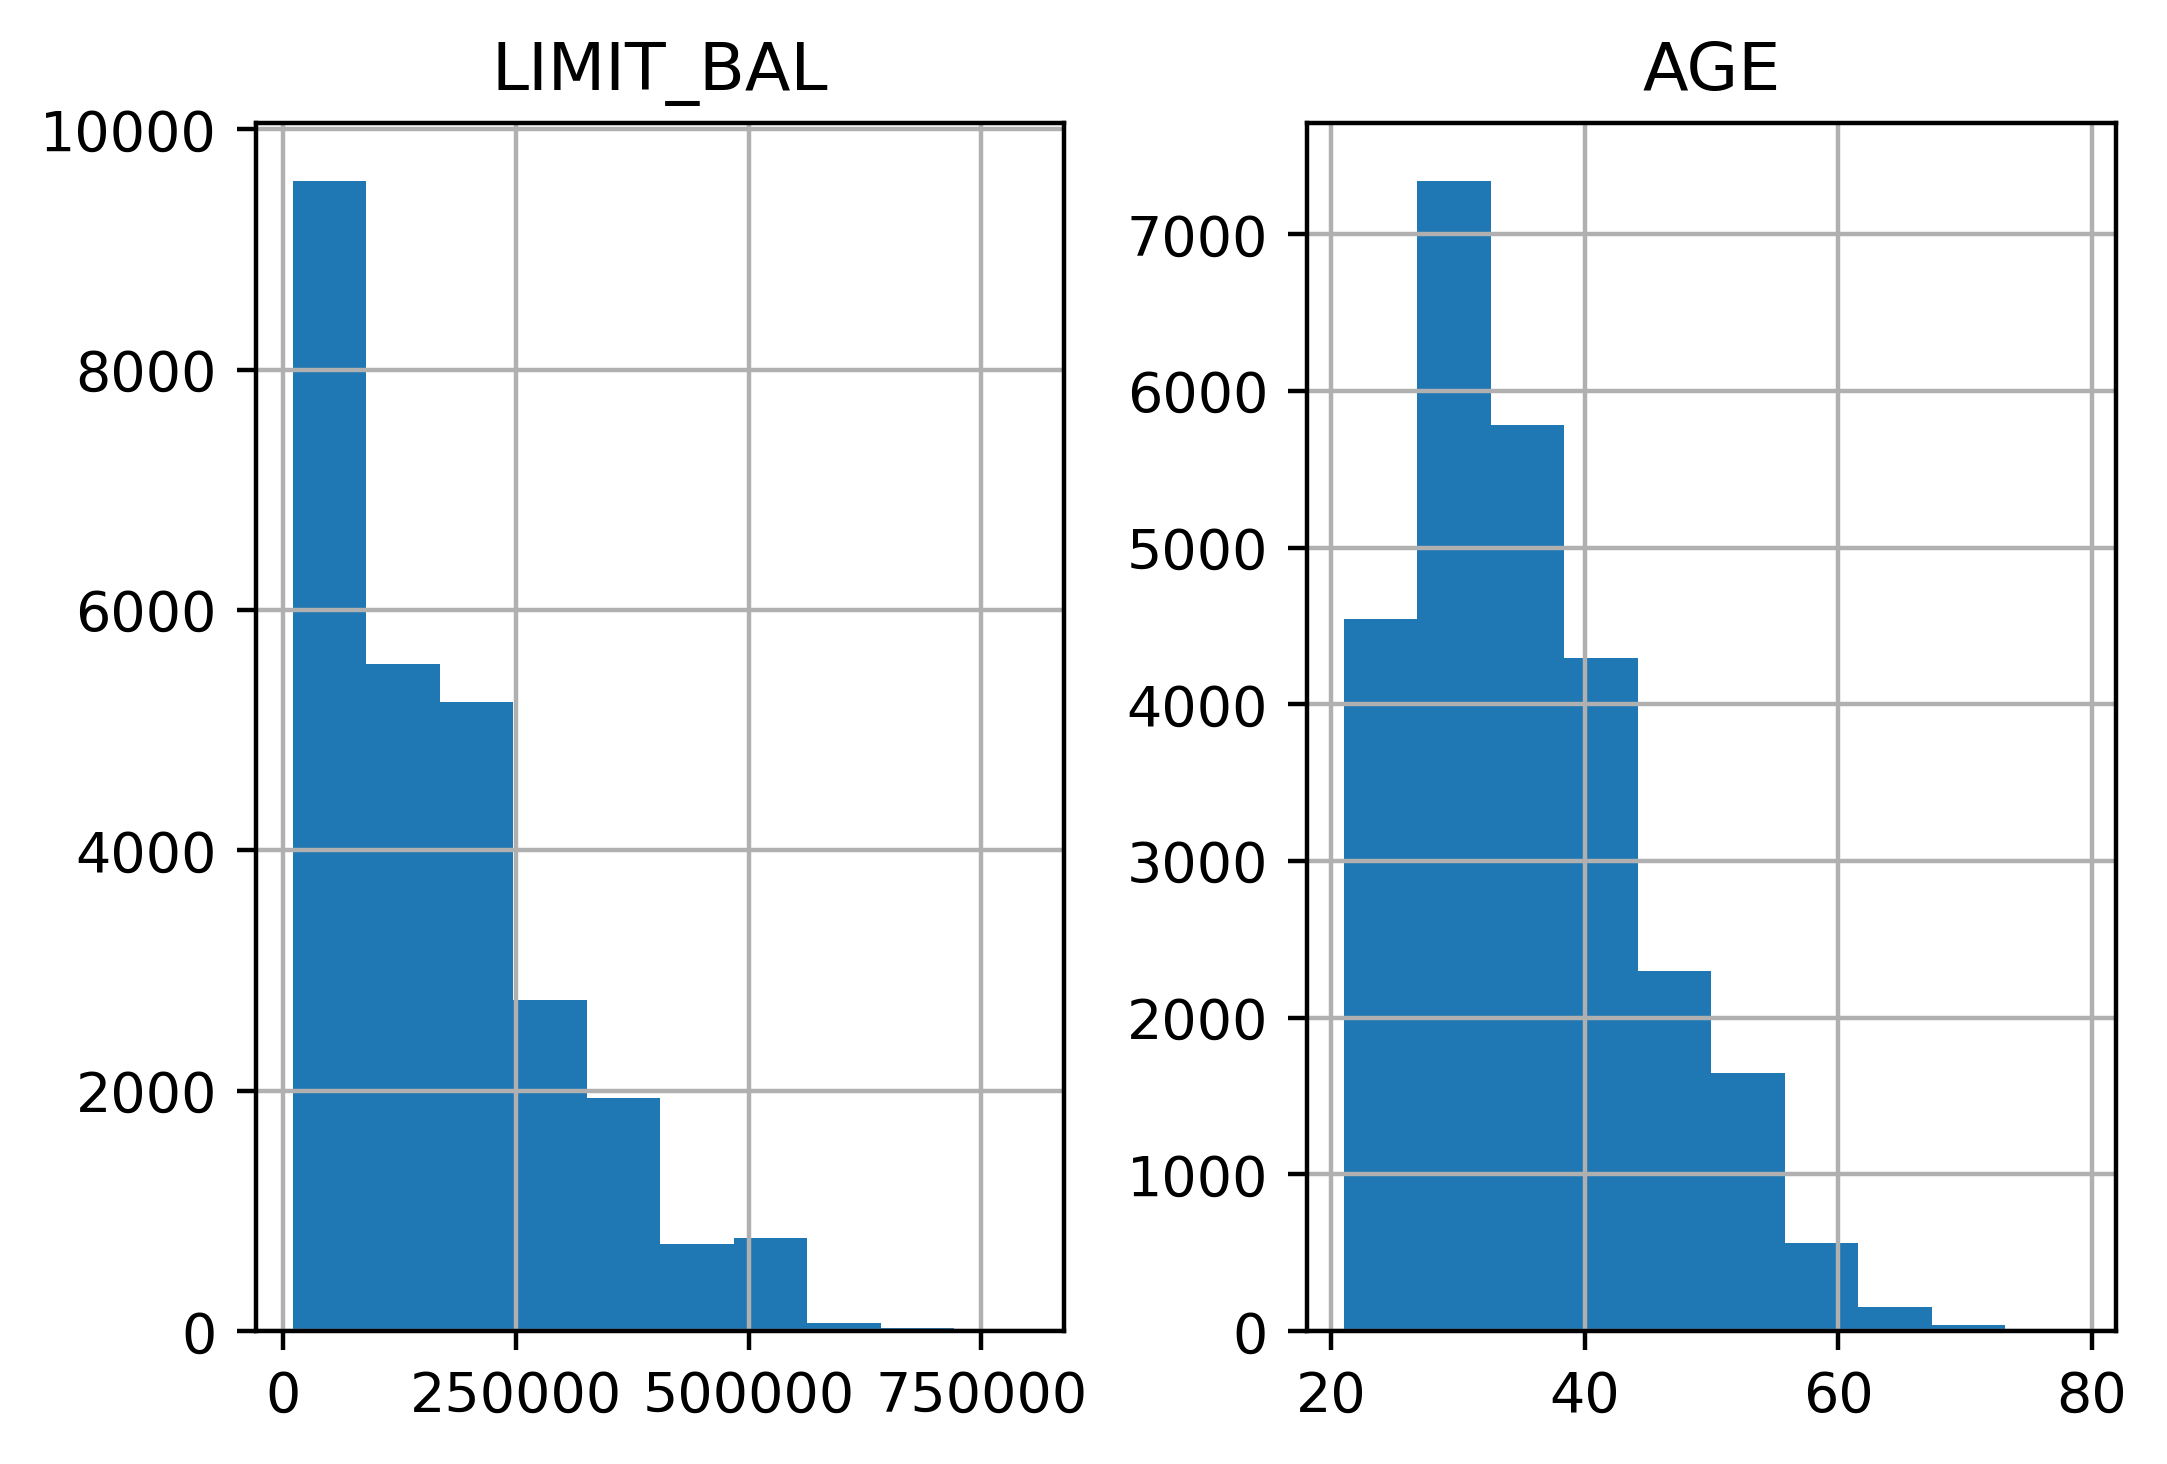

In [83]:
df_clean_2[['LIMIT_BAL', 'AGE']].hist();

In [84]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


O método `describe()` nos traz algumas informações, como a média, a médiana, desvio padrão e os quartis.

Analisando essas informações, juntamento com o histograma é possível chegar em algumas conclusões:

    - O limite de crédito tem como valor mínimo $ 10.000,00 NT (dólares taiwanses) e 75% dos registros estão abaixo de $ 250.000,00 NT
    - As idades são bem distribidas, sendo que ninguém com menos de 21 anos possui uma conta de crédito.

Vamos verificar agora nossa variável `EDUCATION` e contar seus valores.

In [85]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
dtype: int64


Podemos ver que existem valores diferentes do informado no dicionário de dados. 
Nosso contato na empresa falou que desconhece outros graus de informação, logo podemos assumir esse valores desconhecidos na categoria *4 (outros)*. 

Existe um jeito de substituir os valores de uma série por outro usando o método `.replace()`. Nesse método setamos o atributo *to_replace* com a serem alterados e o atributo *value* com o valor que queremos substituir.
Ainda utilizaremos o atributo `inplace=True` para realizar a alteração ***in loco***. Ou seja, ele serve para 'salvar' nossas alterações sem necessidade de uma nova atribuição. As alterações era efetuadas diretamente. 

In [88]:
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)

In [89]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
dtype: int64


Vamos verificar também a variável `MARRIAGE`.

In [90]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
dtype: int64


Também temos um problema de um valor desconhecido. Podemos usar a mesma lógica da variável `EDUCATION` e agrupar esses registros na condição *3 (outros)*. 

In [91]:
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
dtype: int64


## Aprofundando nas características categóricas

Caso ainda não saibam, os algoritmos de machine learning só funcionam com números. As variáveis categóricas terão sempre que ser transformadas em números antes de aplicar o modelo.

Por mero fruto do acaso, nosso dataset já é todo númerico, mas temos que levar em conta alguns pontos, um exemplo nossa variável `EDUCATION`.

Sabemos que ela possui 4 níveis distintos *(1 = pós-graduação; 2 = universidade; 3 = ensino médio; 4 = outros)*.

É possível que o modelo que iremos usar compreenda que nossa distribuição é ***ordinal***, ou seja todos os níveis são mapeados em ordem, sendo 1 o mais alto. Porém, nem todos eles podem funcionar dessa forma.

Então temos que nos atentar a essas características no momento da nossa análise. Para isso, podemos examinar os diferentes níveis de uma característica categórica em relação aos valores médios da nossa variável alvo. Isso pode dar uma ideia se sua codificação ordinal funcionará bem com um modelo linear.

Podemos verificar isso fazendo um agrupamento da nossa variavel preditora com  nossa variavel alvo usando os métodos `.groupby()` e `.agg()`

In [92]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'})

,default payment next month
EDUCATION,
1,0.193901
2,0.235913
3,0.255479
4,0.074879


Vamos visualizar esses dados num histograma.

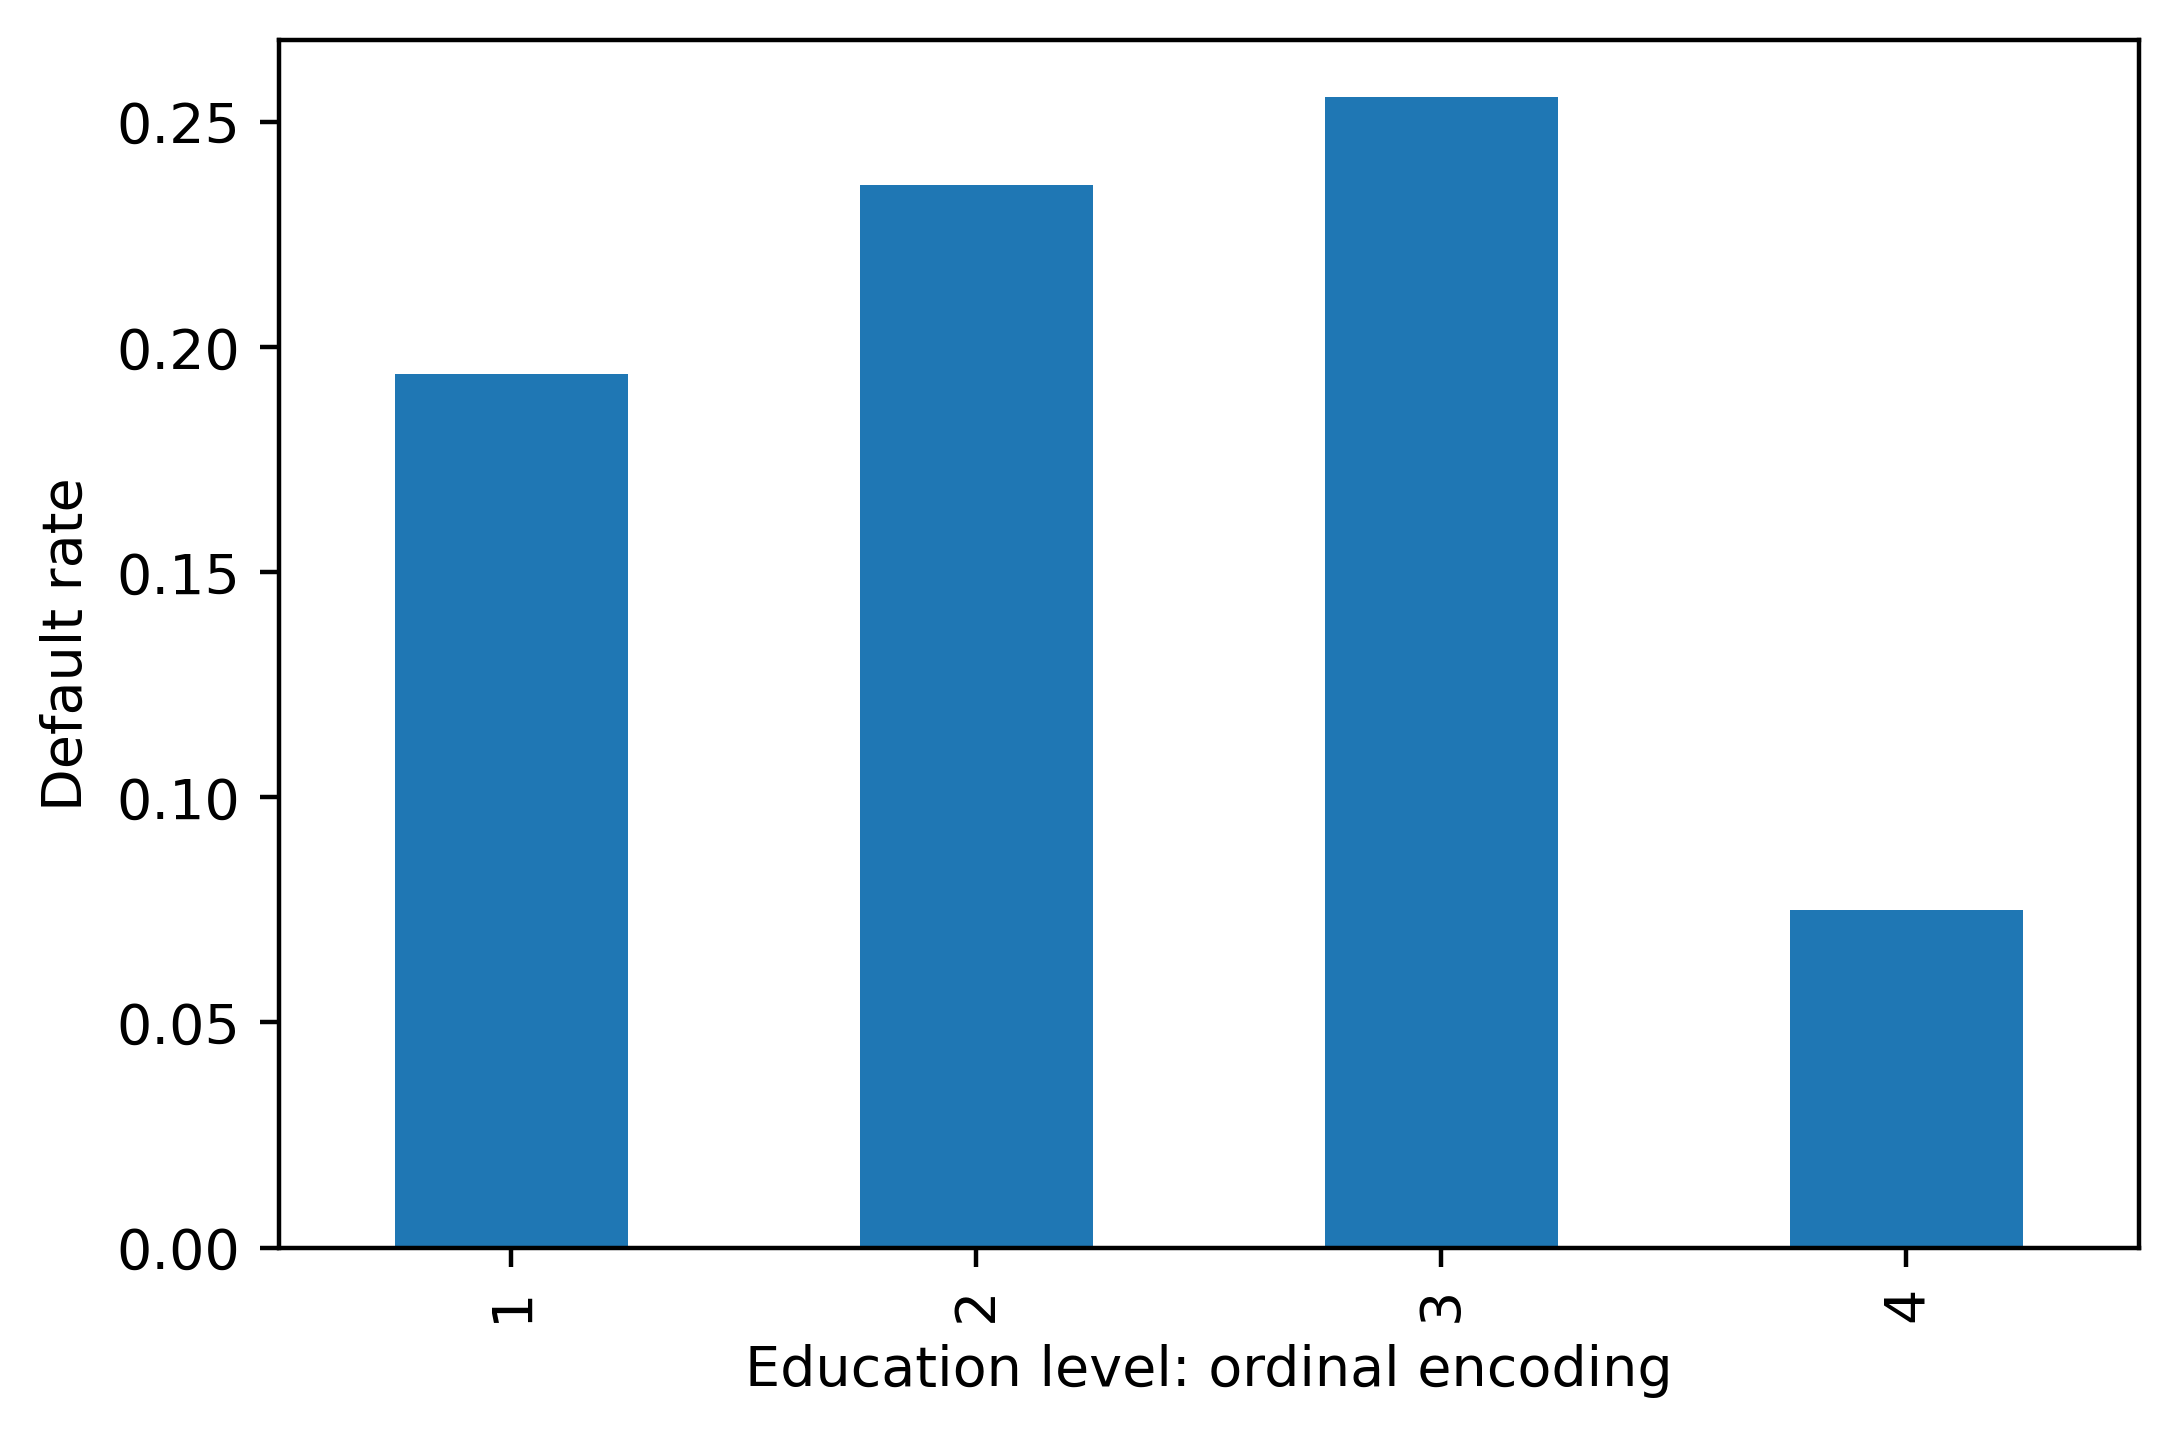

In [94]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'}).plot.bar(legend=False)
plt.ylabel('Default rate')
plt.xlabel('Education level: ordinal encoding');

Vemos que um ajuste linear não seria a melhor descrição para esses dados categóricos, sendo necessária a utilização de algoritmos mais complexos.
Se for o caso de utilizar um modelo linear mais simples e interpretável, uma solução é alterar codificação ordinal e codificar essas variaveis de outra forma.

Para isso, existe um maneira popular chamada **codificação one-hot (OHE, one-hot encocoding)**.

Essa é uma maneira de transformar uma característica categórica em uma característica númerica a ser utilizada por modelos matemáticos.

## Implementando OHE para uma variável categórica

Vamos realizar essa codificação da variável `EDUCATION`. Para isso, será necessário realizar uma *engenharia reversa*, para obter os rótulos do texto que represetam os números atuais.
Então vamos criar uma coluna que contenha os nomes das categorias referentes a cada grau.

Ex: Onde EDUCATION for igual a 1, a variável EDUCATION_CAT será 'pós-graduação'.

Para fazer isso, podemos criar um dicionário das nossas chaves e valores e depois utilizar o método `.map()` para preencher a nossa nova coluna com os valores do nosso dicionário.

In [95]:
cat_mapping = {
    1: "pós-graduação",
    2: "univesidade",
    3: "ensino médio",
    4: "outros"
}

In [96]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)


In [97]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,univesidade
1,2,univesidade
2,2,univesidade
3,2,univesidade
4,2,univesidade
5,1,pós-graduação
6,1,pós-graduação
7,2,univesidade
8,3,ensino médio
9,3,ensino médio


Almost there folks! Almost there.

Agora que mapeamos nossa variável `EDUCATION`, iremos aplicar o one-hot encoding. Existe um método do *pandas* realiza essa operação chamado `.get_dummies()`. 

In [98]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)

,ensino médio,outros,pós-graduação,univesidade
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,0,0,1,0
6,0,0,1,0
7,0,0,0,1
8,1,0,0,0
9,1,0,0,0


Percebam que ao utilizar esse método, nosso retorno foi um outro dataframe com os valores dos atributos sendo transormados em colunas. Essas colunas tem valores booleanos (0 e 1).
Existe sempre somente um valor 1 para cada linha, o que representa aquela categoria específica. No primeiro registros, podemos ver que a única coluna preenchida com 1 é a de 'universidade' e as outras estão com 0. É o equivalente do True or False. 

Essa abordagem melhora o entedimento dos modelos matemáticos da real representatividade de uma variável.

Para finalizar, devemos agora juntar os dois dataframes num só usando o método `.concat()` passando o atributo *axis=1* para que eles sejam concatenados horizontalmente, isto é, ao longo do eixo da coluna.

In [99]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION', 'EDUCATION_CAT', 'pós-graduação',
             'ensino médio', 'univesidade', 'outros']].head(10)

,EDUCATION,EDUCATION_CAT,pós-graduação,ensino médio,univesidade,outros
0,2,univesidade,0,0,1,0
1,2,univesidade,0,0,1,0
2,2,univesidade,0,0,1,0
3,2,univesidade,0,0,1,0
4,2,univesidade,0,0,1,0
5,1,pós-graduação,1,0,0,0
6,1,pós-graduação,1,0,0,0
7,2,univesidade,0,0,1,0
8,3,ensino médio,0,1,0,0
9,3,ensino médio,0,1,0,0


Excelente! Podemos ver que o OHE funcionou corretamente.

Essa abordagem é bem prática quando temos um número pequeno de níveis categóricos numa variável. Em outros casos, é possível usar outras abordagens, como agrupamento de alguns níveis distintos em uma única categoria.

